## Datan analysointi ja Visualisointi - Tehtävät kerta 5

**Opiskelijan nimi (opisk.nro.): TÄHÄN_OMA_NIMESI (OP.NRO.)**

**Harjoituskerran 5** tehtävistä palautetaan omaan repositoryyn muodossa **harjoitus5_etunimi_sukunimi_opiskelijanumero.ipynb**.
Kyseessä on siis opiskelijan **Private repository**, johon tarkastuksen ajaksi on lisätty opettaja **Developer**-oikeuksilla.
Jokaiseen vastattuun tehtävään tulee ajaa niiden ratkaisut näkyville (Output-kentät näkyvät suoraan) palautettavaan Jupyter Notebook -tiedostoon. Tehtäväsi arvioidaan seuraavasti:

* **1,0 p**. Vastaus on täysin oikein.
* **0,5 p**. Vastaus on osittain oikein.
* **0 p**. Vastaus on väärin.

**Tehtävissä ei tule käyttää silmukkarakenteita.** Sen sijaan tämän harjoituksen tehtävät kirjoitetaan ilman funktiorakennetta (skripti-muodossa). Ratkaisusi on täysin oikein, jos saat saman kuvan kuin esimerkkivastauksessa.

Tässä pitää valita oman kiinnostuksen mukaan palauttaako harjoituksen **2 a) vai 2 b)** - molempia harjoituksia ei siis voi palauttaa. **Maksimipistemäärä** harjoituksista on siis aiempaan tapaan **5** pistettä.


## 1. Säädatan esittäminen

Esitetään säädataa, joka on ladattu [Ilmatieteen laitoksen WFS rajapintapalvelusta](https://www.ilmatieteenlaitos.fi/latauspalvelun-pikaohje). Ennen säädatan esittämistä se tulee käsitellä seuraavasti:
* lataa data DataFrameen url:sta 'https://student.labranet.jamk.fi/~huoptu/datananal_s20/kerta5/harjoitukset/saatiedot.csv' ottaen huomioon sarakkeiden erotinmerkin ',' ja desimaalierottimen '.',
* datan ensimmäisessä sarakkeessa (tai indeksissä) on esitetty aika muodossa **vuosi-kuukausi-päivä tunnit:minuutit:sekunnit**,
* muodosta em. aika sarakkeen kaikkia kenttiä (päivämäärä ja kellonkaika) hyödyntämällä uuteen DataFrameen sarake `'aika, s'`, joka kertoo kuinka paljon aikaa on kulunut sekunteina ensimmäisestä mittaushavainnosta eteenpäin,
* lisää uuteen DataFrameen sarake `'Air temperature, degC'`,
* tulosta tekemästäsi em. DataFramesta viisi ensimmäistä riviä.

Kun olet käsitellyt datan, tee xy - tasolle seuraavanlainen kuvaaja:
* aika sarakkeesta `'aika, s'` on esitetty vaaka-akselilla ja ilman lämpötila sarakkeesta `'Air temperature, degC'` on esitetty pystyakselilla,
* em. kuvaajassa datapisteitä on merkitty punaisella pisteellä,
* punaista pistettä esittävälle datalle on merkitty selite (*legend*), jossa lukee `'ilman lämpötila'`,
* vaaka-akelin otsikoksi on kirjoitettu `'aika, s'` ja pystyakselin otsikoksi 'ilman lämpötila $^{o}C$ ',
* huomaa, että akselin otsikkoon voit merkitä fysikaalisen yksikön [TeX syntaksilla](https://en.wikipedia.org/wiki/TeX),
* lisää kuvaajaan myös ruudukko, jossa on musta katkoviiva.

**Esimerkkikuva:**
<img src="https://student.labranet.jamk.fi/~huoptu/datananal_s20/kerta5/harjoitukset/tehtava1.png" width="450"/>


,"aika, s","Air temperature, degC"
0,0,6.5
1,600,6.2
2,1200,5.7
3,1800,5.7
4,2400,5.7


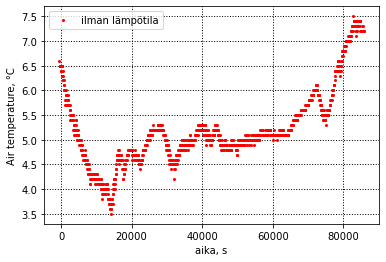

In [13]:
import pandas as pd
import numpy as np
from datetime import datetime
import numpy as np
import matplotlib.pyplot as plt

url='https://student.labranet.jamk.fi/~huoptu/datananal_s20/kerta5/harjoitukset/saatiedot.csv'
df = pd.read_csv(url,delimiter=",",decimal=".") 

#df['datetime']=pd.to_datetime(df['Unnamed: 0'],  format = '%Y-%d-%m %H:%M:%S')
'''
df['date'] = pd.to_datetime(df['Unnamed: 0'])

epoch_time = datetime(1970, 1, 1)
startTime=(df['date'][0:1]-epoch_time).dt.total_seconds().values

df2 = pd.DataFrame()
df2['aika, s']=(df['date']-epoch_time).dt.total_seconds()-startTime
df2['aika, s']=df2['aika, s'].astype(int)
df2['Air temperature, degC']=df['Air temperature, degC']
display(df2[:5])
'''


epoch_time = datetime(1970, 1, 1)


df2 = pd.DataFrame()
df2['aika, s'] = pd.to_datetime(df['Unnamed: 0'])
startTime=(df2['aika, s'][0:1]-epoch_time).dt.total_seconds().values
df2['aika, s']=(df2['aika, s']-epoch_time).dt.total_seconds()-startTime
df2['aika, s']=df2['aika, s'].astype(int)
df2['Air temperature, degC']=df['Air temperature, degC']
display(df2[:5])



X = df2['aika, s']
Y = df2['Air temperature, degC']
plt.plot(X, Y, 'o', color = 'red',markersize=2)
plt.grid(True)
plt.rc('grid', linestyle=':', color='black', linewidth=1)
plt.legend(['ilman lämpötila'])
plt.xlabel('aika, s')
plt.ylabel('Air temperature, \xb0C')
plt.show()

## 2. Vaihtoehto a) Säädatan esittäminen (2)

Esitetään säädataa, joka on ladattu [Ilmatieteen laitoksen WFS rajapintapalvelusta](https://www.ilmatieteenlaitos.fi/latauspalvelun-pikaohje). Ennen säädatan esittämistä se tulee käsitellä seuraavasti:
* lataa data DataFrameen url:sta 'https://student.labranet.jamk.fi/~huoptu/datananal_s20/kerta5/harjoitukset/saatiedot.csv' ottaen huomioon sarakkeiden erotinmerkin ',' ja desimaalierottimen '.',
* datan ensimmäisessä sarakkeessa (tai indeksissä) on esitetty aika muodossa **vuosi-kuukausi-päivä tunnit:minuutit:sekunnit**,
* muodosta em. aika-sarakkeen kaikkia kenttiä (päivämäärä ja kellonkaika) hyödyntämällä uuteen DataFrameen sarake `'aika, s'`, joka kertoo kuinka paljon aikaa on kulunut sekunteina ensimmäisestä mittaushavainnosta eteenpäin,
* lisää uuteen DataFrameen sarakkeet `'Air temperature, degC'` ja `'Wind speed, m/s'`,
* tulosta tekemästäsi em. DataFramesta viisi ensimmäistä riviä.

Kun olet käsitellyt datan, tee xy - tasolle seuraavanlainen kuvaaja:
* aika sarakkeesta `'aika, s'` on esitetty vaaka-akselilla ja ilman lämpötila sarakkeesta 'Air temperature, degC' on esitetty vasemman puoleisella pystyakselilla ja tuulen nopeus sarakkeesta `'Wind speed, m/s'` on esitetty oikean puoleisella pystyakselilla,
* em. kuvaajassa datapisteitä (`'aika, s','Air temperature, degC'`) on merkitty punaisella pisteellä ja datapisteitä (`'aika, s','Wind speed, m/s'`) on merkitty sinisellä pisteellä,
* datapisteiden (`'aika, s','Air temperature, degC'`) selite *'ilman lämpötila'* (*legend*) on esitetty kuvassa oikealla alhaalla,
* datapisteiden (`'aika, s','Wind speed, m/s'`) selite *'tuulen nopeus'* (legend) on esitetty kuvassa vasemmalla ylhäällä,
* x-akselilla on esitetty aika yksiköissä $\cdot 10^{3}$ s ja x-akselin otsikko on 'aika, $\cdot 10^{3}$ s',
* vasemman puoleisen y-akselin otsikkona on 'ilman lämpötila, $^{o}C$',
* oikean puoleisen y-akselin otsikkona on `'tuulen nopeus, m/s'`,
* muuta x-akselin asteikkojaotus esimerkkikuvan kaltaiseksi,
* lisää kuvaajaan ruudukko, jossa on musta katkoviiva,
* aseta kuvan taustan väriksi (RGB) **'#D7F8FF'**,
* aseta kuvan otsikoksi *'Säätila Jyväskylän lentoasemalla'*.

**Esimerkkikuva:**
<img src="https://student.labranet.jamk.fi/~huoptu/datananal_s20/kerta5/harjoitukset/tehtava2.png" width="450"/>

## 2. Vaihtoehto b) Valioliigan sarjataulukko (1)

Esitetään valioliigadataa:
* lataa data DataFrameen url:sta 'url = "https://student.labranet.jamk.fi/~pelju/data_av/samples/premium_league_2018_19/england-premier-league-teams-2018-to-2019-stats.csv"

Esitetään valittujen valioliigajoukkueiden koti- ja vierasvoitot samassa pylväsdiagrammissa. Ennen datan esittämistä se pitää käsitellä seuraavasti:
* lataa data DataFrameen tehtävästä annetusta url-osoitteesta
* lisää uuteen DataFrameen sarakkeet `common_name`, `wins_home` (kotipelien voitot) ja `wins_away` (vieraspelien voitot).
* valitse DataFrameen seuraavat joukkueet (`common_name`-sarakkeesta): `` 'Arsenal', 'Tottenham Hotspur', 'Manchester City', 'Manchester United', 'Chelsea', 'Liverpool', 'Everton' ``

* Lyhennä joukkueiden nimet kuvaajaa varten tekemällä uusi sarake *short_name*: `` 'Arsenal', 'Tottenham', 'ManCity', 'ManU', 'Chelsea', 'Liverpool', 'Everton' ``
* Tee uusi DataFrame käyttäen *df.melt(id_vars, var_name, value_name ...)*-metodia, johon tulee uudet sarakkeet `Win Type` ja `Wins`
```
   short_name   Win Type  Wins
0     Arsenal  wins_home    14
::::::::::::::::::::::::::::::
7     Arsenal  wins_away     7
```

* Kun olet käsitellyt datan, piirrä **(x,y)**-tasolle pylväsdiagrammi, jossa *x-akselilla* on joukkueen lyhennetty nimi ja *y-akselilla* on sekä kotivoittojen (`wins_home`) että vierasvoittojen lukumäärä (`wins_away`):
* aseta y-akselin pylväille myös selite (engl. *Legend*)
* käännä x-akselin otsikoita 30 astetta (vinkki: *xticks*)
* aseta kuvalle otsikko (*Title*)


**Esimerkkikuva:**
<img src="https://student.labranet.jamk.fi/~pelju/datanav_k22/topic5/h5_t2.png" width="450"/>


[14, 12, 18, 10, 10, 17, 12]


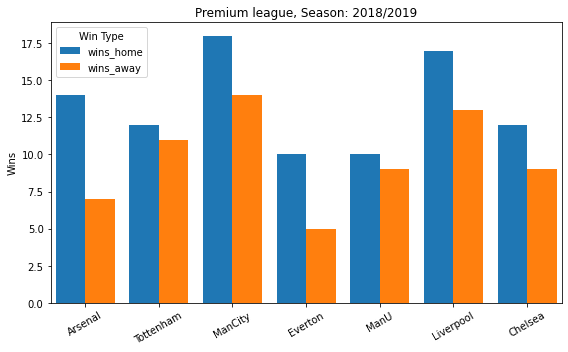

In [84]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


url = "https://student.labranet.jamk.fi/~pelju/data_av/samples/premium_league_2018_19/england-premier-league-teams-2018-to-2019-stats.csv"
df = pd.read_csv(url,delimiter=",",decimal=".") 

df2 = pd.DataFrame(columns=['common_name','wins_home','wins_away'])

df2=df.loc[df['common_name'].isin(['Arsenal','Tottenham Hotspur','Manchester City','Manchester United','Chelsea','Liverpool','Everton'])]
shortNames=['Arsenal', 'Tottenham', 'ManCity','Everton','ManU','Liverpool','Chelsea']
df2.insert(len(df2.columns), 'short_name', shortNames, True)

winTypes=['wins_home','wins_away']

df2=df2.melt(id_vars =['short_name'] ,var_name ='Win Type', value_name='Wins',value_vars=winTypes,ignore_index=True)

winsHome=df2.loc[df2['Win Type']==winTypes[0]]['Wins'].tolist()
winsAway=df2.loc[df2['Win Type']==winTypes[1]]['Wins'].tolist()

labels = shortNames 

x = np.arange(len(labels))  # the label locations
width = 0.4  # the width of the bars

fig, ax = plt.subplots(figsize=(8,5))
ax.bar(x - width/2, winsHome, width)
ax.bar(x + width/2, winsAway, width)

ax.set_ylabel('Wins')
ax.set_title('Premium league, Season: 2018/2019')
ax.set_xticks(x);
ax.set_xticklabels(labels)
plt.xticks(rotation = 30)
ax.legend(title='Win Type',loc='upper left',labels=['wins_home','wins_away'])

ax.margins(x=0.01)
fig.tight_layout()

plt.show()


## 3. Valioliigan sarjataulukko (2)

Esitetään valioliigadataa:
* lataa data DataFrameen url:sta 'url = "https://student.labranet.jamk.fi/~pelju/data_av/samples/premium_league_2018_19/england-premier-league-teams-2018-to-2019-stats.csv"

Esitetään valittujen valioliigajoukkueiden koti- ja vierasvoitot samassa pylväsdiagrammissa. Ennen datan esittämistä se pitää käsitellä seuraavasti:
* lataa data DataFrameen tehtävässä annetusta url:sta
* lisää uuteen DataFrameen sarakkeet `team_name, common_name, season, wins, draws` ja `losses`.
* valitse DataFrameen seuraavat joukkueet (`common_name`): ``'Arsenal', 'Tottenham Hotspur', 'Manchester City', 'Manchester United', 'Chelsea', 'Liverpool', 'Everton'``
* Lyhennä joukkueiden nimet kuvaajaa varten tekemällä uusi sarake *short_name*: ``'Arsenal', 'Tottenham', 'ManCity', 'ManU', 'Chelsea', 'Liverpool', 'Everton'``
* Lisää dataframeen kokonaan uusi sarake `points` (*pisteet*), jonka laskukaava on ``voitot * 3 + tasapelit`` (tappioista saa nolla pistettä): eli ``'wins' * 3 + 'draws'``

Kun olet käsitellyt datan, tee (`x,y`)-tasolle käännetty pylväsdiagrammi, jossa *y*-akselilla on joukkueen lyhennetty nimi ja
*x*-akselilla on joukkueen keräämät pisteet:
* pyri kääntämään *y*-akselin otsikoita 30 astetta (vinkki: `plt.yticks()`)
* aseta *y*-akselin pylväille myös otsikko, johon haet tiedot kaudesta (`season`) ja pelien määrästä (`matches_played`) alkuperäisestä DataFramesta
* lisää kuvaan myös ruudukko (vinkki: *grid*)

**Esimerkkikuva:**
<img src="https://student.labranet.jamk.fi/~pelju/datanav_k22/topic5/h5_t3.png" width="450"/>


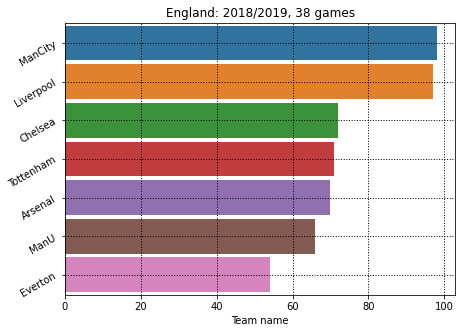

In [117]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


url = "https://student.labranet.jamk.fi/~pelju/data_av/samples/premium_league_2018_19/england-premier-league-teams-2018-to-2019-stats.csv"
df = pd.read_csv(url,delimiter=",",decimal=".") 
df2 = pd.DataFrame(columns=['team_name', 'common_name', 'season', 'wins', 'draws','losses'])

df2=df.loc[df['common_name'].isin(['Arsenal','Tottenham Hotspur','Manchester City','Manchester United','Chelsea','Liverpool','Everton'])]
shortNames=['Arsenal', 'Tottenham', 'ManCity','Everton','ManU','Liverpool','Chelsea']
df2.insert(len(df2.columns), 'short_name', shortNames, True)

winTypes=['wins_home','wins_away']

df2.insert(len(df2.columns), 'points', (df2['wins'] * 3 + df2['draws']), True)
df3=df2[['short_name','points']]
df3=df3.sort_values(by='points',ascending=True)
x=df3['points'].tolist()
y=df3['short_name'].tolist()

plt.figure(figsize=(7,5)) 
plt.margins(y=0.01)

plt.barh(y, x,height = 0.9,color=['#d684bd','#845b53','#9070af','#c03d3e','#3a923a','#e1812c','#31739f'])
plt.yticks(rotation = 30)

plt.grid(True)
plt.rc('grid', linestyle=':', color='black', linewidth=1)
 
plt.xlabel("Team name")

plt.title("England: "+str(df2['season'][:1].values[0])+", "+str(df2['matches_played'][:1].values[0])+" games")
plt.show()


## 4. Autodatan esittäminen

#### Datan esikäsittely

Lataa data DataFrameen URL-osoitteesta: https://student.labranet.jamk.fi/~huoptu/datananal_s20/kerta5/harjoitukset/autot.csv, kun olet huomioinut sarakkeiden erotinmerkit `'\t'`.
Tallenna uuteen DataFrameen vain ne rivit, joissa autonvalmistajalla (sarake `Mh`) on enemmän kuin 50 autoa. Muuta uudessa DataFramessa sarakkeen `Ft` merkkijonojen '*DIESEL*' tilalle '*Diesel*' ja '*PETROL*' tilalle '*Petrol*'. Jos sarakkeessa `Ft` on merkkijono '*NG*'*, korvaa se merkkijonolla '*Natural gas*'.

#### Datan visualisointi

Tee esimerkkikuvan kaltainen kuvaaja, jossa hyödynnät tuottamasi DataFramen sarakkeita autojen polttoainetyypin `Ft` ja auton valmistajan `Mh` osalta.

**Esimerkkikuva:**
<img src="https://student.labranet.jamk.fi/~huoptu/datananal_s20/kerta5/harjoitukset/tehtava3.png" width="500"/>

## 5. Autodatan esittäminen (2)

#### Datan esikäsittely

Lataa data DataFrameen [url:sta](https://student.labranet.jamk.fi/~huoptu/datananal_s20/kerta5/harjoitukset/autot.csv), kun olet huomioinut sarakkeiden erotinmerkit '\t'. Tallenna uuteen DataFrameen vain ne rivit, joissa autonvalmistajalla (sarake **Mh**) on enemmän kuin 50 autoa ja sarakkeessa **Enedc (g/km)** on nollaa suurempia arvoja.

#### Datan visualisointi

Tee esimerkkikuvan kaltainen histogrammi, josta käy ilmi $CO_2$ päästöjen (sarake **Enedc (g/km)**) jakautuminen 100 eri lukualuevälin mukaan sekä kumulatiivinen histogrammi $CO_2$ päästöistä (sarake **Enedc (g/km)**). Otathan huomioon logaritmisen asteikon todennäköisyystiheysjakaumille.

**Esimerkkikuva:**
<img src="https://student.labranet.jamk.fi/~huoptu/datananal_s20/kerta5/harjoitukset/tehtava4.png" width="500"/>


NISSAN                   82
FORD WERKE GMBH         377
AUTOMOBILES CITROEN     934
SKODA                  3552
Name: Mh, dtype: int64
[82, 377, 934, 3552]
['NISSAN', 'FORD WERKE GMBH', 'AUTOMOBILES CITROEN', 'SKODA']
############
['Petrol', 'Diesel', 'Natural gas', 'Electric']
¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤
Ft                   Diesel  Electric  Natural gas  Petrol
Mh                                                        
AUTOMOBILES CITROEN   299.0       NaN          NaN   635.0
FORD WERKE GMBH       165.0       NaN          NaN   207.0
NISSAN                 21.0       7.0          NaN    54.0
SKODA                1332.0       NaN         33.0  2187.0
--------------
[635.0, 207.0, 54.0, 2187.0]
[299.0, 165.0, 21.0, 1332.0]
[0.0, 0.0, 0.0, 33.0]
[0.0, 0.0, 7.0, 0.0]
['NISSAN', 'FORD WERKE GMBH', 'AUTOMOBILES CITROEN', 'SKODA']
ooooooooooooooooooooo
['NISSAN', 'FORD WERKE GMBH', 'AUTOMOBILES CITROEN', 'SKODA']
åååååå


C:\Users\timol\AppData\Local\Temp/ipykernel_19576/3481646529.py:128: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(mhList)


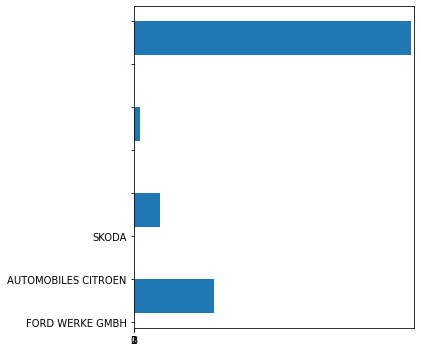

In [117]:
import pandas as pd
import numpy as np

url="https://student.labranet.jamk.fi/~huoptu/datananal_s20/kerta5/harjoitukset/autot.csv"
df = pd.read_csv(url, sep='\t')
df2=df.copy()
#print(df2['Mh'].dtype)
#df2=df2.loc[df2['Mh']>50]
#print(df2)
#print(df2.columns)

df2.loc[df2['Ft'] == 'DIESEL', 'Ft'] = 'Diesel'
df2.loc[df2['Ft'] == 'PETROL', 'Ft'] = 'Petrol'

#df3=df2.loc[df['Ft'].str.contains('NG')==True]
#df3.loc[df3['Ft'].str.contains('NG')==True,'Ft']='Natural gas'
#xx=df2['Mh'].values_counts()
#tulos=df2.loc[(df2['Mh'].value_counts().values)>50] 

tulos=df2['Mh'].value_counts(sort=True,ascending=True)
#print(tulos)

#tulos=df2['Mh'].value_counts(sort=True,ascending=True).values
#print(tulos)
# my_value_count.loc[my_value_count.index < 0.4]
dfx=tulos.loc[tulos > 50]
print(dfx)
print("================")
print(dfx.values.tolist())
#print(dfx.index.tolist())

mhList=dfx.index.tolist()
print(mhList)
print("############")




df2=df2.loc[df2['Mh'].isin(mhList)==True]
#print(df2)



df2.loc[df2['Ft'].str.contains('NG')==True,'Ft']='Natural gas'


fuelTypes=df2['Ft'].drop_duplicates()
fuelTypes=fuelTypes.dropna().values.tolist()
print(fuelTypes)
print("¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤")
#df2.fillna(value=0,inplace=True)


#print(df2)
#print(df2['Ft'])
#df3=df2.loc[df2['Ft'].str.contains('Natural gas')==True]
#print(df3)

tulos=pd.crosstab(df2['Mh'],df2['Ft'],values=df2['Ft'], aggfunc = 'count')

#tulox=tulos[['Diesel',  'Electric',  'Natural gas', 'Petrol']]

print(tulos)
#tulos=tulos.T
print("--------------")
#print(tulos)
tulos.fillna(value=0,inplace=True)

for i in range(len(tulos)):
    print(tulos[fuelTypes[i]].tolist())

y=mhList
print(y)
print("ooooooooooooooooooooo")
    
    
'''
print("xxxxxxxxxxxxxxxx")
print(tulos)
tulos=tulos.T
print("--------------")
print(tulos)
tulos.fillna(value=0,inplace=True)

for i in range(len(tulos)):
    print(tulos[mhList[i]].tolist())
'''    
    
#sarake = 'country\tcountry_code\tETS information\tmain activity sector name\tunit\tvalue\tyear'
#df=df[sarake].str.split('\t', expand=True)
'''
cols = sarake.split('\t')
df.columns =cols
df=df[['country','main activity sector name']]

tobedropped=['20-99 All stationary installations','21-99 All industrial installations (excl. combustion)']
for i in range(len(tobedropped)):
    df.drop(df[df['main activity sector name']==tobedropped[i]].index, inplace = True)        

df.rename(columns = {'main activity sector name':'sector'}, inplace = True)

tulos=df['sector'].value_counts(sort=True,ascending=True)[:5]

print(tulos)
'''    
#x = np.arange(len(labels))  # the label locations
x = np.arange(4) # saadaan haettua tai paremminkin pitää laittaa aikaisemmin taulukkoon
width = 0.4  # the width of the bars

#fig, ax = plt.subplots(figsize=(8,5))

fig, ax = plt.subplots(figsize=(10,5))
fig.tight_layout(pad=5)

ax=plt.subplot(1,2,2)

ax.barh(x - width/2, tulos[fuelTypes[0]].tolist(), width)

#ax.barh(x - width/2, tulos[mhList[0]].tolist(), width)
#ax.barh(x + width/2, tulos[mhList[1]].tolist(), width)
#ax.barh(x + width*1.5, tulos[mhList[2]].tolist(), width)
#ax.barh(x + width*2.5, tulos[mhList[3]].tolist(), width)

#ax.set_ylabel('Wins')
#ax.set_title('Premium league, Season: 2018/2019')
ax.set_xticks(x);
#ax.set_xticklabels(labels)
ax.set_yticklabels(mhList)
print(mhList)
print("åååååå")
#plt.xticks(rotation = 30)
#ax.legend(title='Win Type',loc='upper left',labels=['wins_home','wins_away'])

ax.margins(x=0.01)
fig.tight_layout()

plt.show()


NISSAN                   82
FORD WERKE GMBH         377
AUTOMOBILES CITROEN     934
SKODA                  3552
Name: Mh, dtype: int64
[82, 377, 934, 3552]
['NISSAN', 'FORD WERKE GMBH', 'AUTOMOBILES CITROEN', 'SKODA']
############
['Petrol', 'Diesel', 'Natural gas', 'Electric']
¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤
Ft                   Diesel  Electric  Natural gas  Petrol
Mh                                                        
AUTOMOBILES CITROEN   299.0       NaN          NaN   635.0
FORD WERKE GMBH       165.0       NaN          NaN   207.0
NISSAN                 21.0       7.0          NaN    54.0
SKODA                1332.0       NaN         33.0  2187.0
--------------
[635.0, 207.0, 54.0, 2187.0]
[299.0, 165.0, 21.0, 1332.0]
[0.0, 0.0, 0.0, 33.0]
[0.0, 0.0, 7.0, 0.0]
['NISSAN', 'FORD WERKE GMBH', 'AUTOMOBILES CITROEN', 'SKODA']
ooooooooooooooooooooo


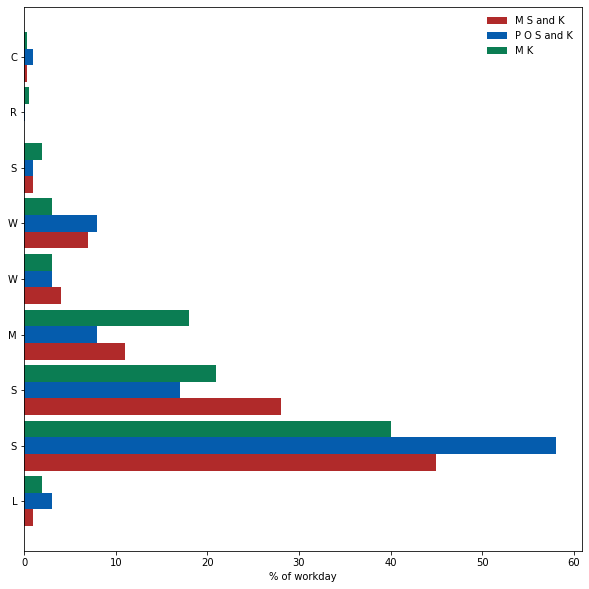

In [160]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


url="https://student.labranet.jamk.fi/~huoptu/datananal_s20/kerta5/harjoitukset/autot.csv"
df = pd.read_csv(url, sep='\t')
df2=df.copy()
#print(df2['Mh'].dtype)
#df2=df2.loc[df2['Mh']>50]
#print(df2)
#print(df2.columns)

df2.loc[df2['Ft'] == 'DIESEL', 'Ft'] = 'Diesel'
df2.loc[df2['Ft'] == 'PETROL', 'Ft'] = 'Petrol'

#df3=df2.loc[df['Ft'].str.contains('NG')==True]
#df3.loc[df3['Ft'].str.contains('NG')==True,'Ft']='Natural gas'
#xx=df2['Mh'].values_counts()
#tulos=df2.loc[(df2['Mh'].value_counts().values)>50] 

tulos=df2['Mh'].value_counts(sort=True,ascending=True)
#print(tulos)

#tulos=df2['Mh'].value_counts(sort=True,ascending=True).values
#print(tulos)
# my_value_count.loc[my_value_count.index < 0.4]
dfx=tulos.loc[tulos > 50]
print(dfx)
print("================")
print(dfx.values.tolist())
#print(dfx.index.tolist())

mhList=dfx.index.tolist()
print(mhList)
print("############")




df2=df2.loc[df2['Mh'].isin(mhList)==True]
#print(df2)



df2.loc[df2['Ft'].str.contains('NG')==True,'Ft']='Natural gas'


fuelTypes=df2['Ft'].drop_duplicates()
fuelTypes=fuelTypes.dropna().values.tolist()
print(fuelTypes)
print("¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤")
#df2.fillna(value=0,inplace=True)


#print(df2)
#print(df2['Ft'])
#df3=df2.loc[df2['Ft'].str.contains('Natural gas')==True]
#print(df3)

tulos=pd.crosstab(df2['Mh'],df2['Ft'],values=df2['Ft'], aggfunc = 'count')

#tulox=tulos[['Diesel',  'Electric',  'Natural gas', 'Petrol']]

print(tulos)
#tulos=tulos.T
print("--------------")
#print(tulos)
tulos.fillna(value=0,inplace=True)

for i in range(len(tulos)):
    print(tulos[fuelTypes[i]].tolist())

y=mhList
print(y)
print("ooooooooooooooooooooo")
    


N = 9
labels = list('LSSMWWSRC')
M_means = [1, 45, 28, 11, 4, 7, 1, 0.02, 0.3]
K_means = [2, 40, 21, 18, 3, 3, 2, 0.52, 0.3]
PO_means = [3, 58, 17, 8, 3, 8, 1, 0.06, 1]
#K = [1, 44, 30, 11, 3, 7, 1, 0.01, 0.5]

# rename x/width to y/height
y = np.arange(len(labels))
height = 0.30

fig, ax = plt.subplots(figsize=(10,10))


# use ax.barh instead of ax.bar
rects1 = ax.barh(y - height, M_means, height, label='M S and K', color='#b02a2a')
rects2 = ax.barh(y, PO_means, height, label='P O S and K', color='#055cad')
rects3 = ax.barh(y + height, K_means, height, label='M K', color='#0b7d53')

# swap set_x* methods with set_y* methods
ax.set_xlabel('% of workday')
ax.set_yticks(y)
ax.set_yticklabels(labels)
ax.legend(loc='upper right', frameon=False, markerscale=2)

#ax.bar_label(rects1, padding=10)
#ax.bar_label(rects2, padding=10)
#ax.bar_label(rects3, padding=10)

SKODA                  3552
NISSAN                   82
AUTOMOBILES CITROEN     934
FORD WERKE GMBH         377
Name: Mh, dtype: int64
[3552, 82, 934, 377]
['Petrol', 'Diesel', 'Natural gas', 'Electric']
¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤
EEEEEEEEEEEEEEEEEEE
Mh
AUTOMOBILES CITROEN    10
FORD WERKE GMBH        20
NISSAN                 30
SKODA                  20
Name: Electric, dtype: int64
Ft                   Diesel  Electric  Natural gas  Petrol
Mh                                                        
AUTOMOBILES CITROEN   299.0        10          NaN   635.0
FORD WERKE GMBH       165.0        20          NaN   207.0
NISSAN                 21.0        30          NaN    54.0
SKODA                1332.0        20         33.0  2187.0
--------------
Ft                   Diesel  Electric  Natural gas  Petrol
Mh                                                        
AUTOMOBILES CITROEN   299.0        10          0.0   635.0
FORD WERKE GMBH       165.0        20          0.0   207.0
NISSAN      

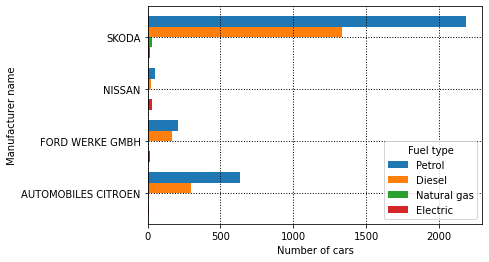

In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


url="https://student.labranet.jamk.fi/~huoptu/datananal_s20/kerta5/harjoitukset/autot.csv"
df = pd.read_csv(url, sep='\t')
df2=df.copy()
#print(df2['Mh'].dtype)
#df2=df2.loc[df2['Mh']>50]
#print(df2)
#print(df2.columns)

df2.loc[df2['Ft'] == 'DIESEL', 'Ft'] = 'Diesel'
df2.loc[df2['Ft'] == 'PETROL', 'Ft'] = 'Petrol'

#df3=df2.loc[df['Ft'].str.contains('NG')==True]
#df3.loc[df3['Ft'].str.contains('NG')==True,'Ft']='Natural gas'
#xx=df2['Mh'].values_counts()
#tulos=df2.loc[(df2['Mh'].value_counts().values)>50] 

#tulos=df2['Mh'].value_counts(sort=True,ascending=True)
tulos=df2['Mh'].value_counts(sort=False,ascending=True)
#print(tulos)

#tulos=df2['Mh'].value_counts(sort=True,ascending=True).values
#print(tulos)
# my_value_count.loc[my_value_count.index < 0.4]
dfx=tulos.loc[tulos > 50]
print(dfx)
print("================")
print(dfx.values.tolist())
#print(dfx.index.tolist())

mhList=dfx.index.tolist()
#print(mhList)
#print("############")




df2=df2.loc[df2['Mh'].isin(mhList)==True]
#print(df2)



df2.loc[df2['Ft'].str.contains('NG')==True,'Ft']='Natural gas'


fuelTypes=df2['Ft'].drop_duplicates()
fuelTypes=fuelTypes.dropna().values.tolist()
print(fuelTypes)
print("¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤¤")
#df2.fillna(value=0,inplace=True)


#print(df2)
#print(df2['Ft'])
#df3=df2.loc[df2['Ft'].str.contains('Natural gas')==True]
#print(df3)

# laittaa aakkosjärjestykseen
tulos=pd.crosstab(df2['Mh'],df2['Ft'],values=df2['Ft'], aggfunc = 'count')

print("EEEEEEEEEEEEEEEEEEE")
tulos['Electric']=[10,20,30,20]
print(tulos['Electric'])

mhList=tulos.index.tolist()

#tulox=tulos[['Diesel',  'Electric',  'Natural gas', 'Petrol']]

print(tulos)
#tulos=tulos.T
print("--------------")

tulos.fillna(value=0,inplace=True)
print(tulos)

#for i in range(len(tulos)):
#    print(tulos[fuelTypes[i]].tolist())

y=mhList
print(y)
print("ooooooooooooooooooooo")
    


#N = 9
#N = len(mhList)
#labels = list('LSSMWWSRC')
labels = mhList
#labels = mhList.copy()
#labels.reverse()
print(labels)
print("----------------------------------------------------")
#M_means = [1, 45, 28, 11, 4, 7, 1, 0.02, 0.3]
#M_means = mhList
#M_means = tulos[fuelTypes[0]].tolist()
#K_means = [2, 40, 21, 18, 3, 3, 2, 0.52, 0.3]
#K_means = tulos[fuelTypes[0]].tolist()
#PO_means = [3, 58, 17, 8, 3, 8, 1, 0.06, 1]
#K = [1, 44, 30, 11, 3, 7, 1, 0.01, 0.5]

# rename x/width to y/height
y = np.arange(len(labels))
#y = np.arange(len(mhList))
height = 0.2

#fig, ax = plt.subplots(figsize=(11,7))
fig, ax = plt.subplots()


# use ax.barh instead of ax.bar


for i in range(len(mhList)):
    print("i="+str(i))
    print(tulos[fuelTypes[i]].tolist())
    ax.barh(y+height*2.5-(height+height*i), tulos[fuelTypes[i]].tolist(), height, label=fuelTypes[i])


#ax.barh(y + height, tulos[fuelTypes[0]].tolist(), height, label=fuelTypes[0], color='#b02a2a')
#rects2 = ax.barh(y, PO_means, height, label='P O S and K', color='#055cad')
#rects3 = ax.barh(y + height, K_means, height, label='M K', color='#0b7d53')

# swap set_x* methods with set_y* methods
ax.set_xlabel('Number of cars')
ax.set_ylabel('Manufacturer name')
ax.set_yticks(y)
ax.set_yticklabels(labels)
ax.legend(title='Fuel type', loc='lower right', frameon=True, markerscale=2)
plt.grid(True)
plt.rc('grid', linestyle=':', color='black', linewidth=1)
plt.show()

#ax.bar_label(rects1, padding=10)
#ax.bar_label(rects2, padding=10)
#ax.bar_label(rects3, padding=10)